In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('c:/reposit/data/kaggle/4/train.csv')
test = pd.read_csv('c:/reposit/data/kaggle/4/test.csv')

train.shape, test.shape

((9557, 143), (23856, 142))

In [3]:
train.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [10]:
train.select_dtypes(np.int64).nunique()

hacdor             2
rooms             11
hacapo             2
v14a               2
refrig             2
                  ..
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      10
agesq             97
Target             4
Length: 130, dtype: int64

In [9]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index()

1       1
2     101
4       2
6       2
7       3
9       3
10      3
11      3
13      5
14      1
22      3
97      3
dtype: int64

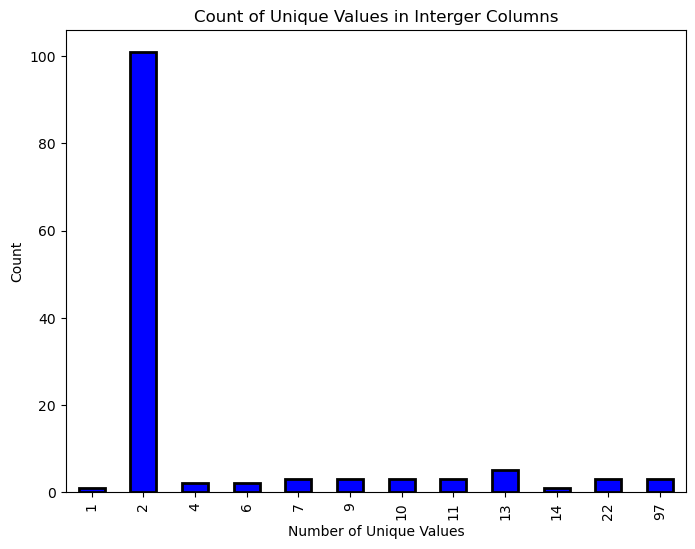

In [13]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue',
                                                                             figsize=(8, 6),
                                                                             edgecolor='k',
                                                                             linewidth=2)

plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Interger Columns')

plt.show()

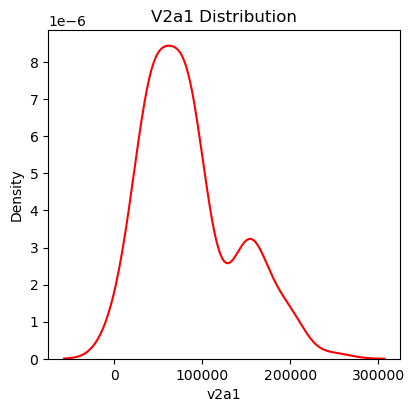

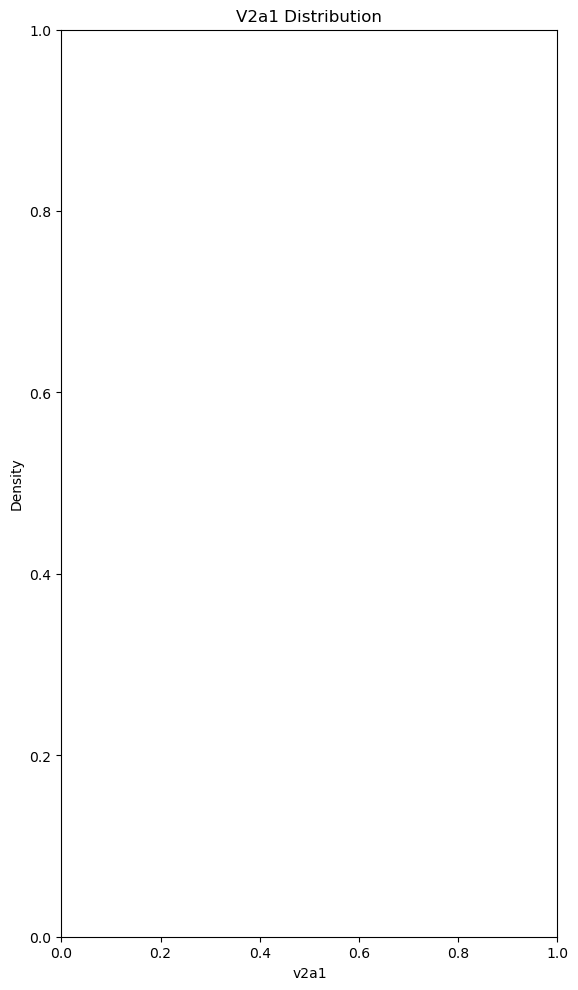

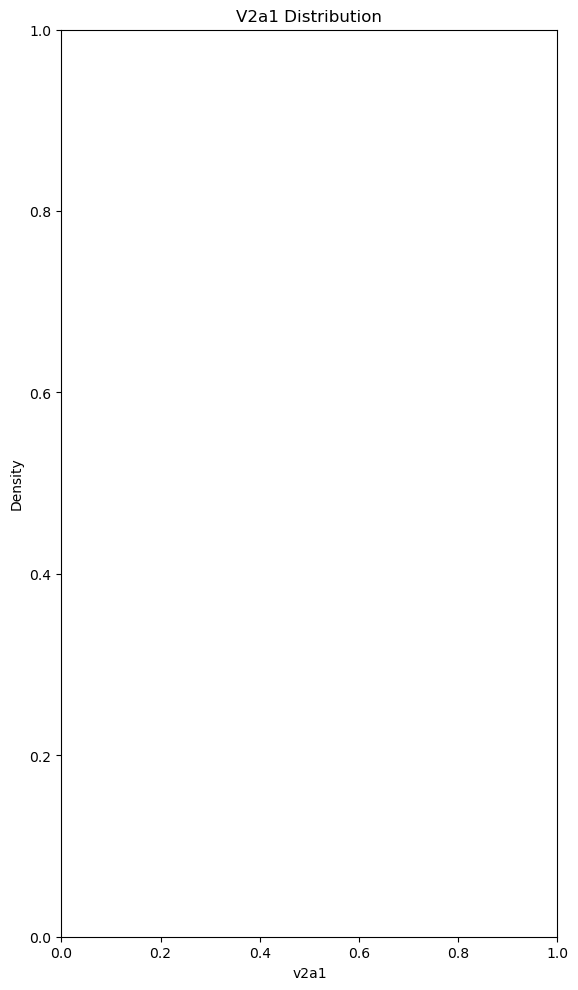

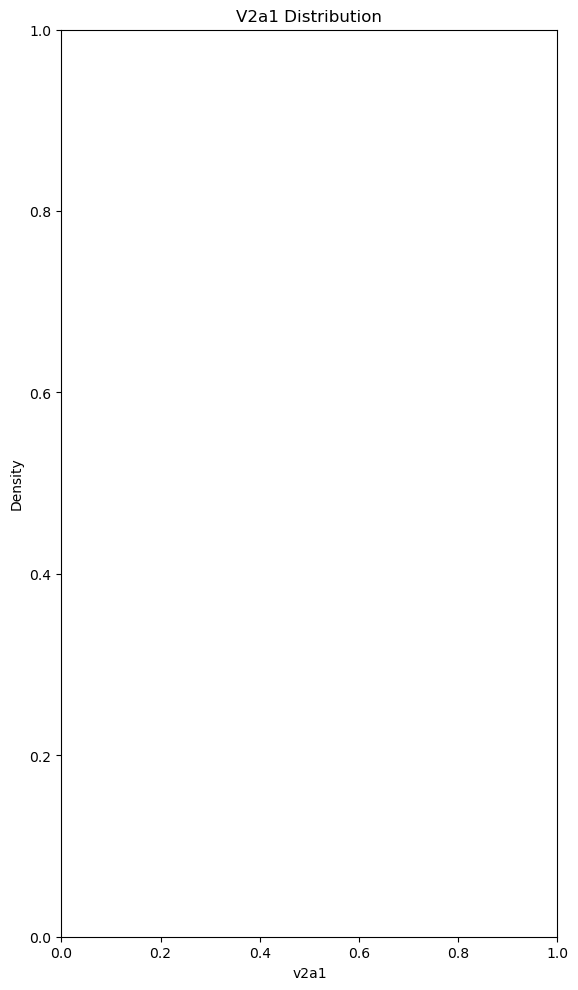

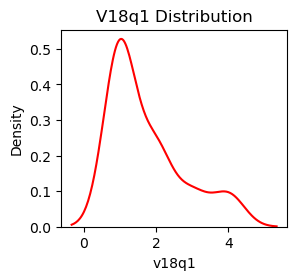

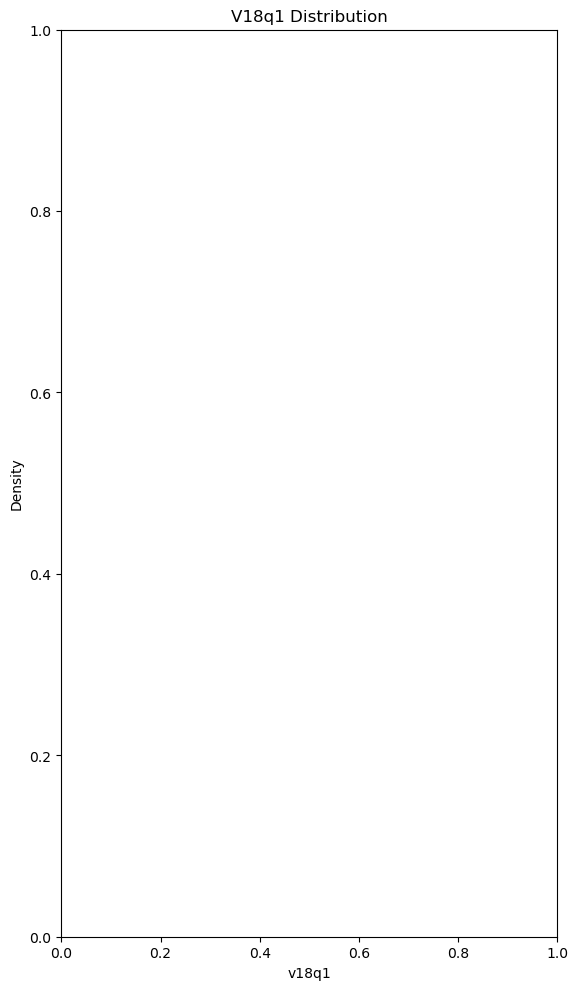

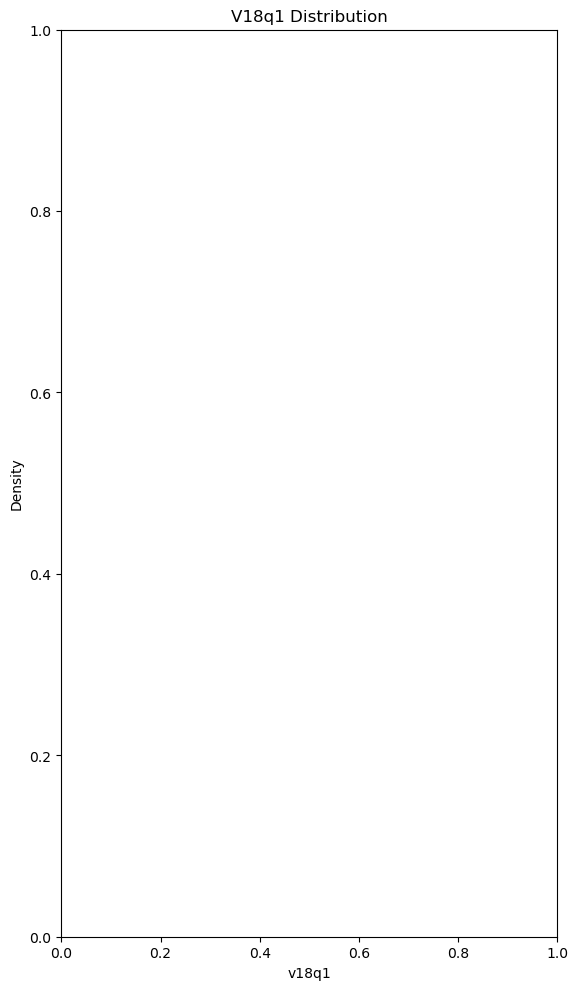

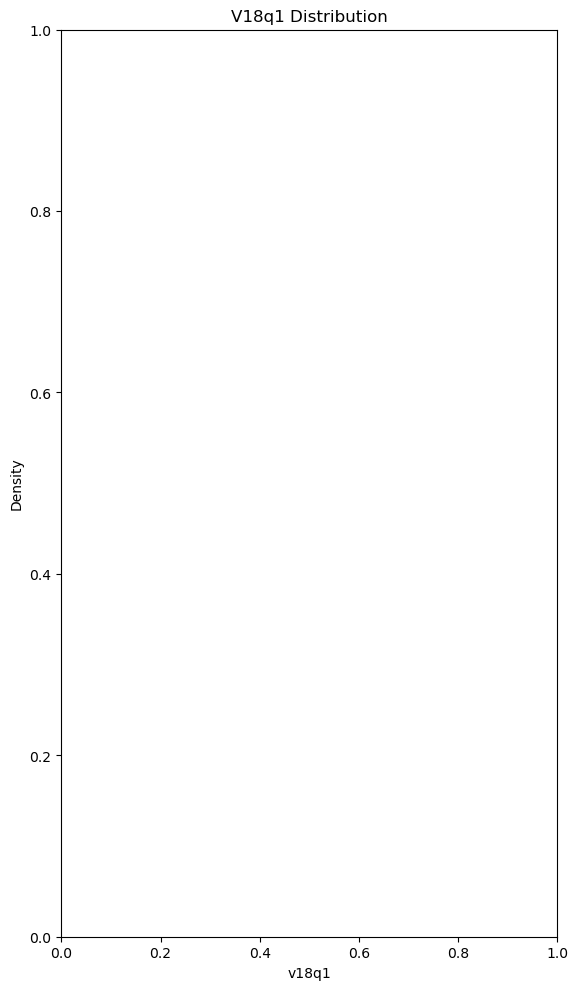

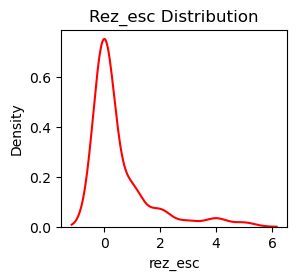

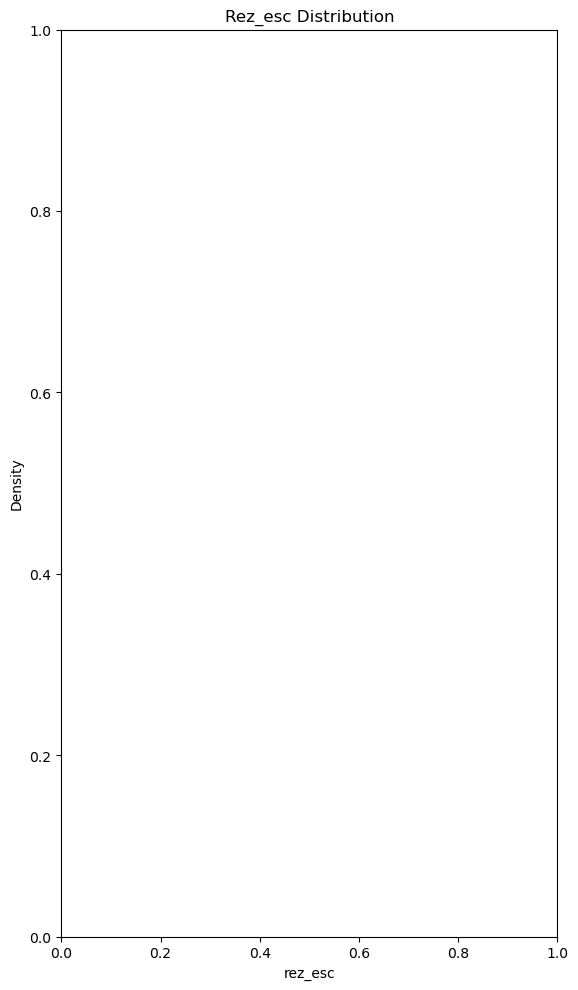

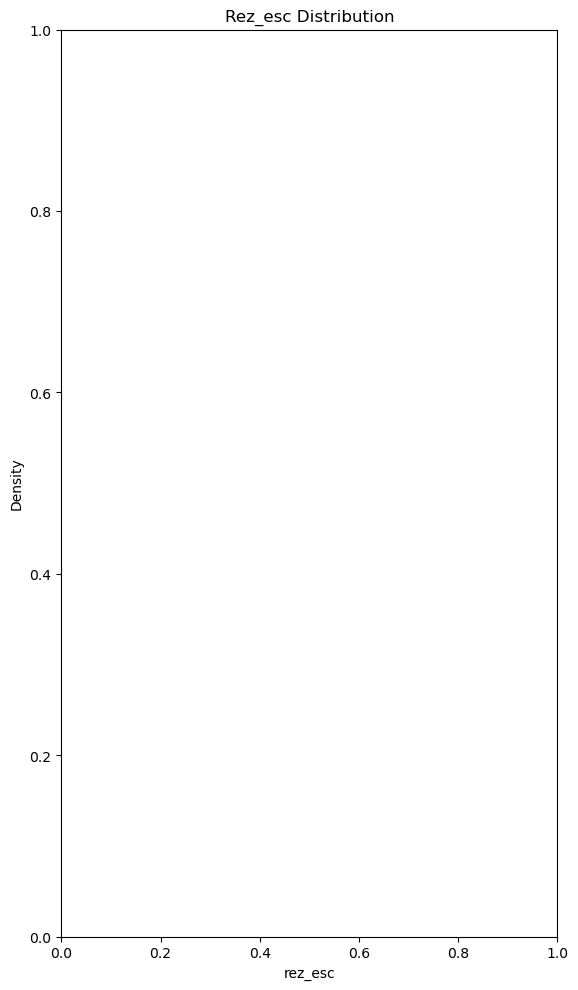

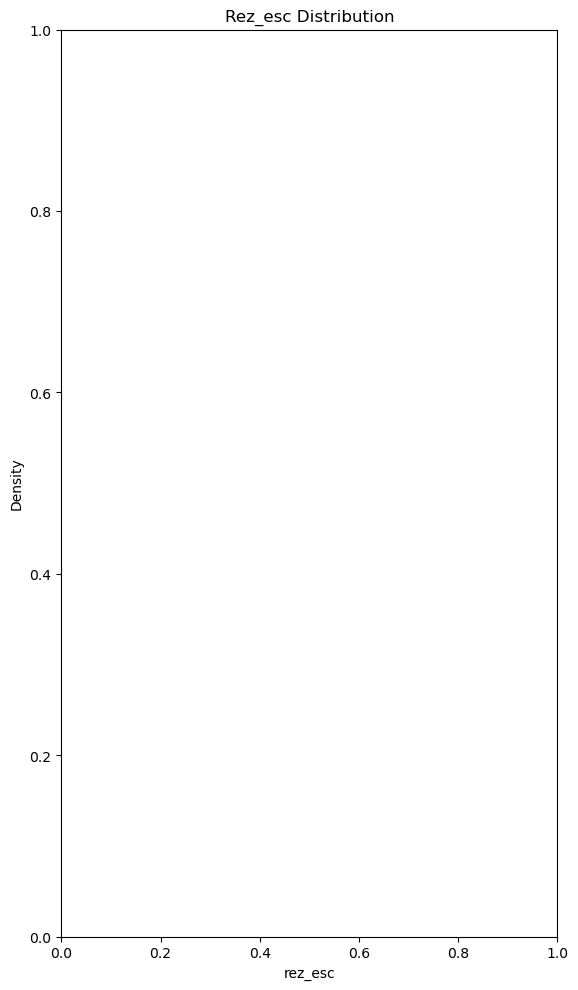

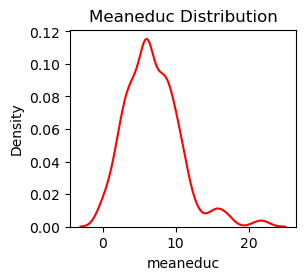

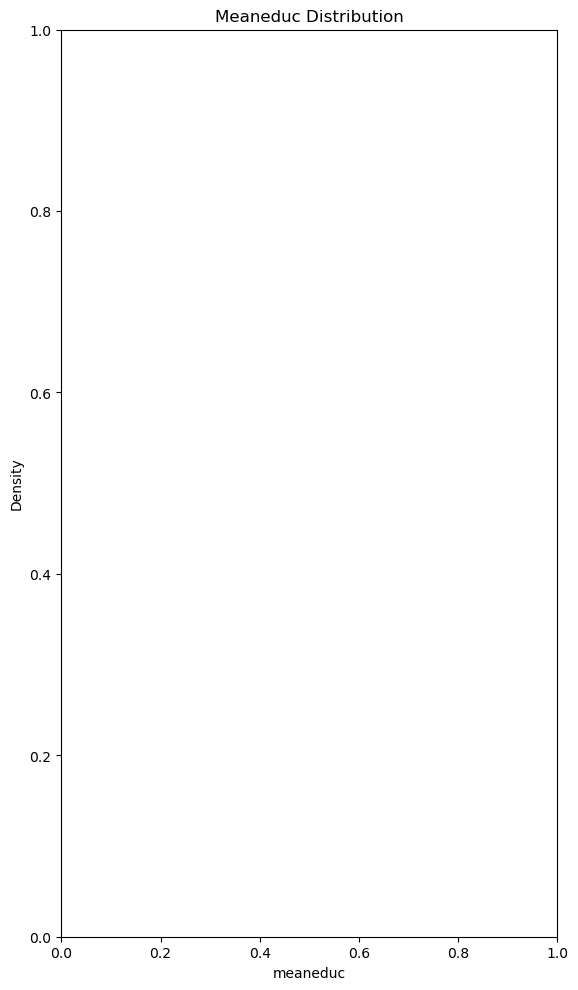

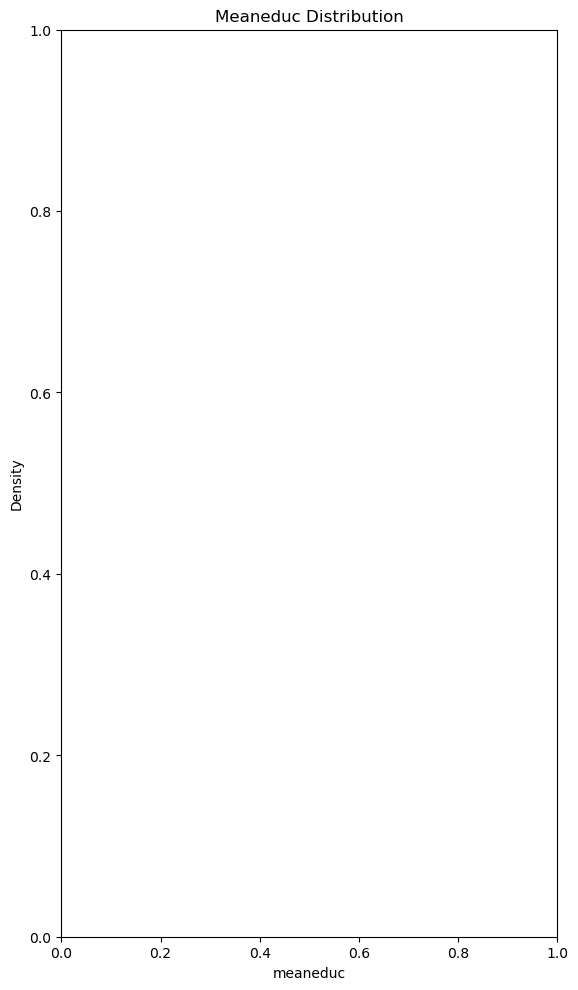

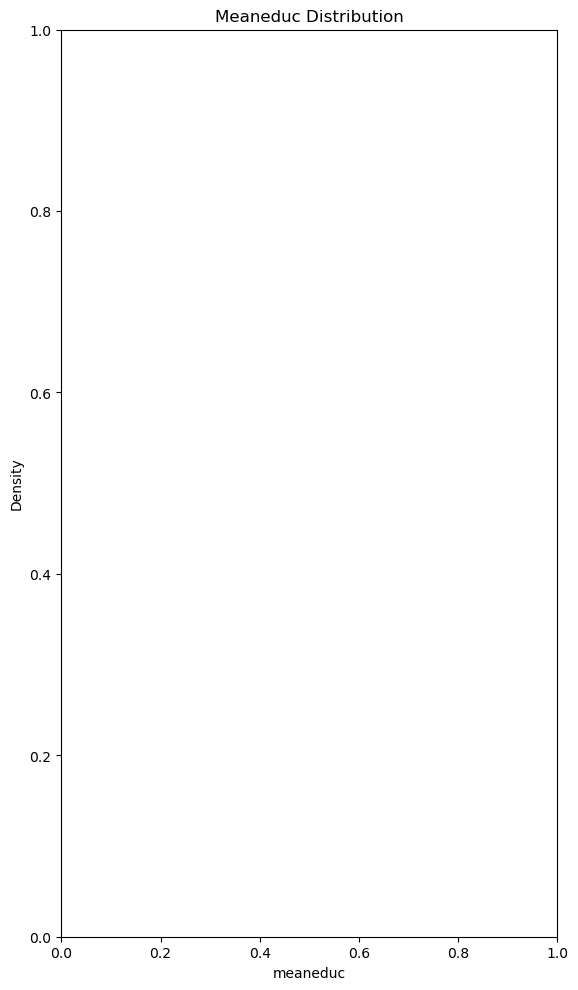

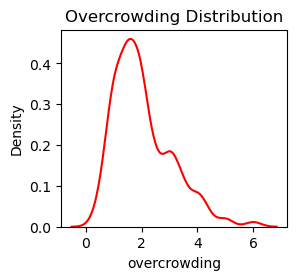

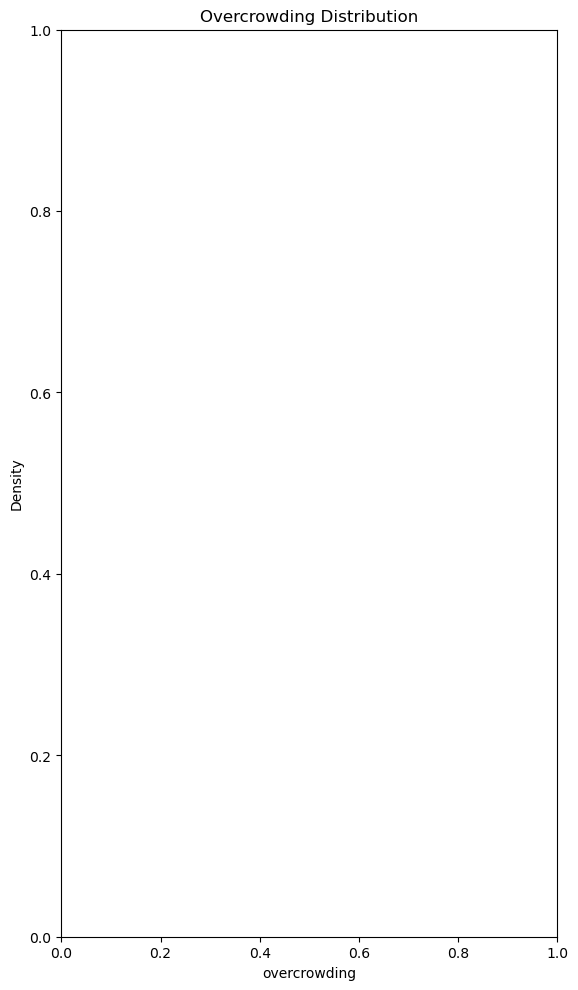

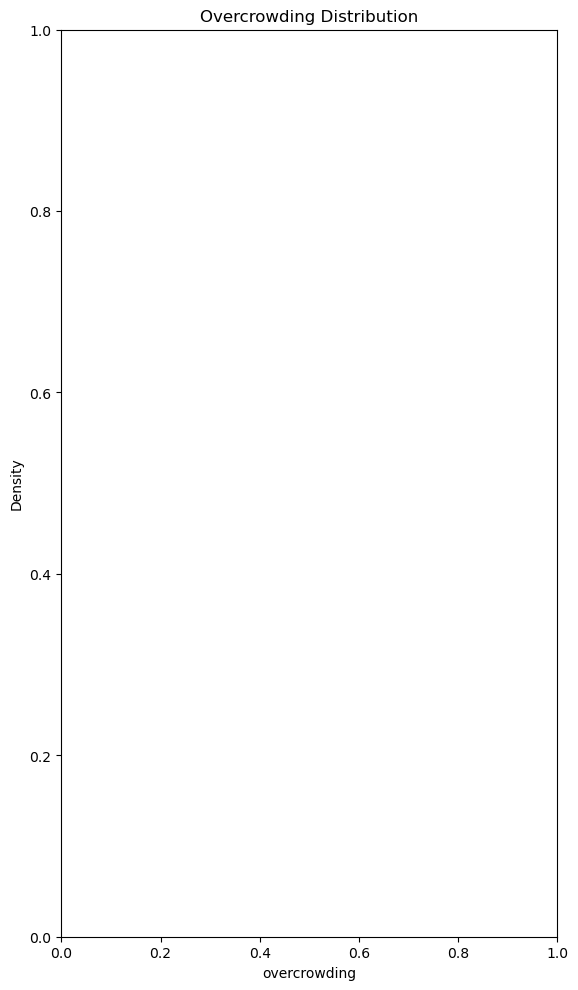

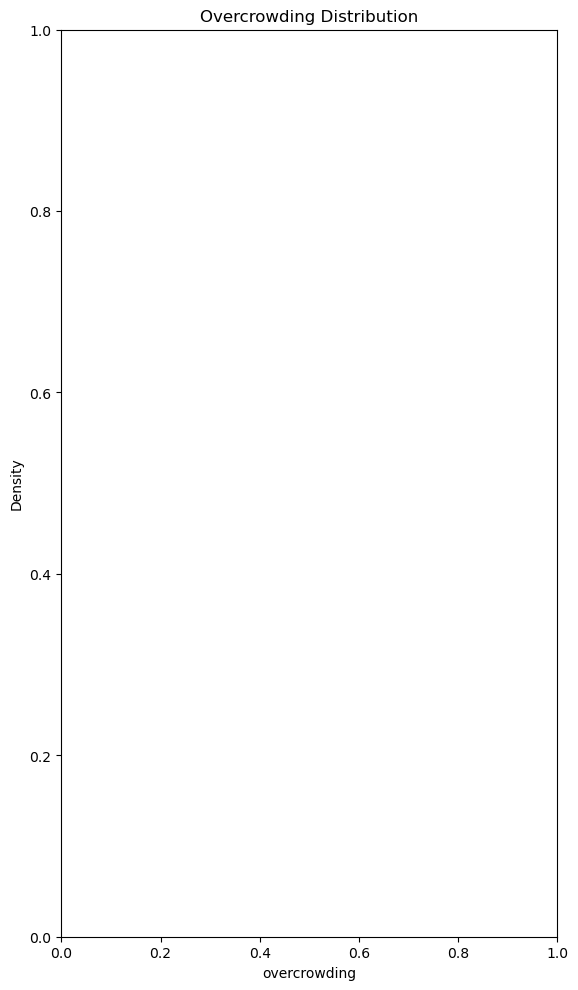

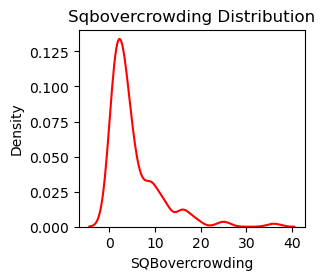

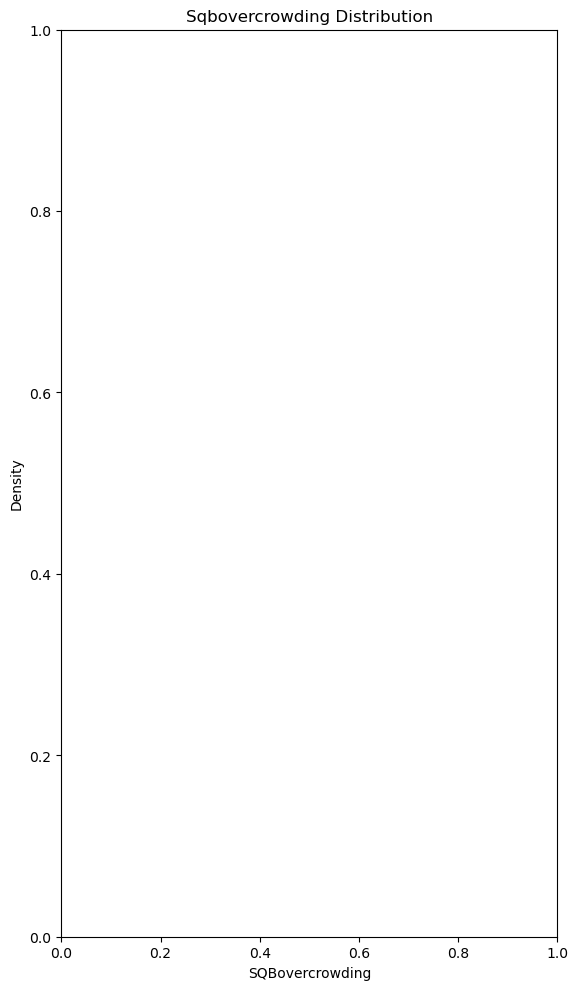

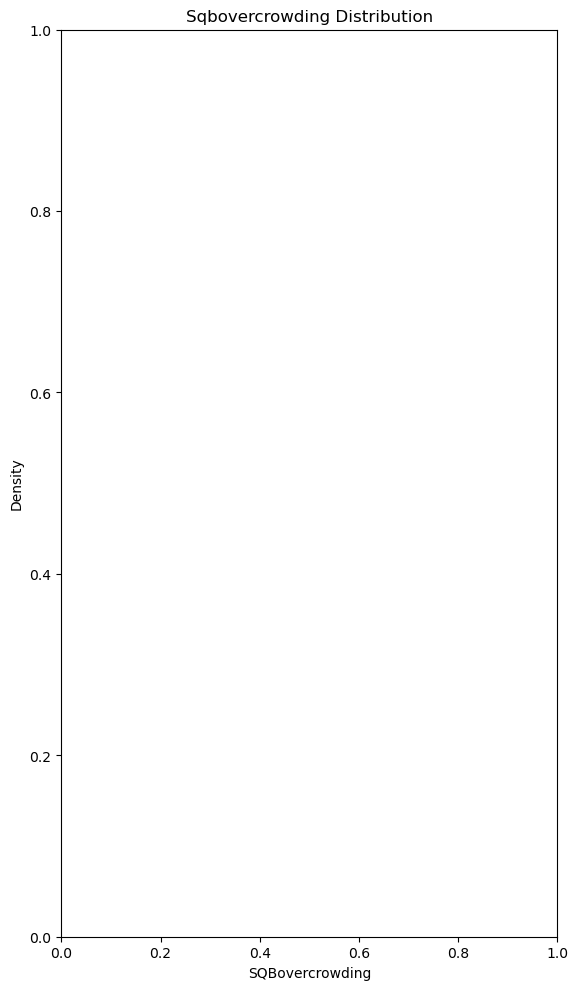

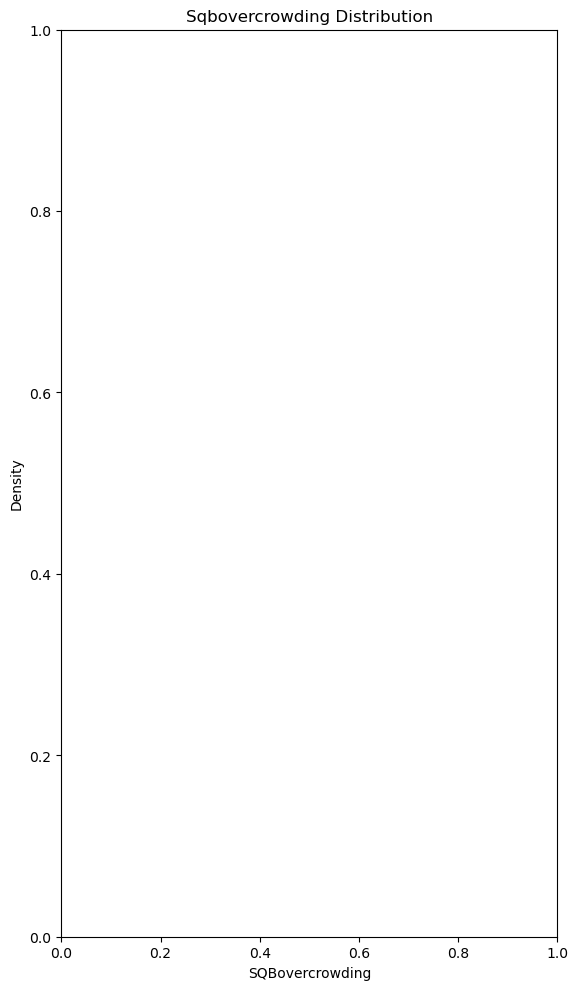

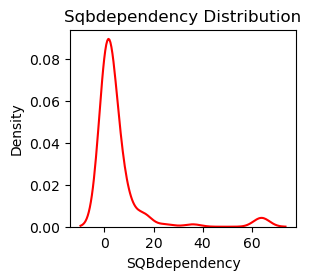

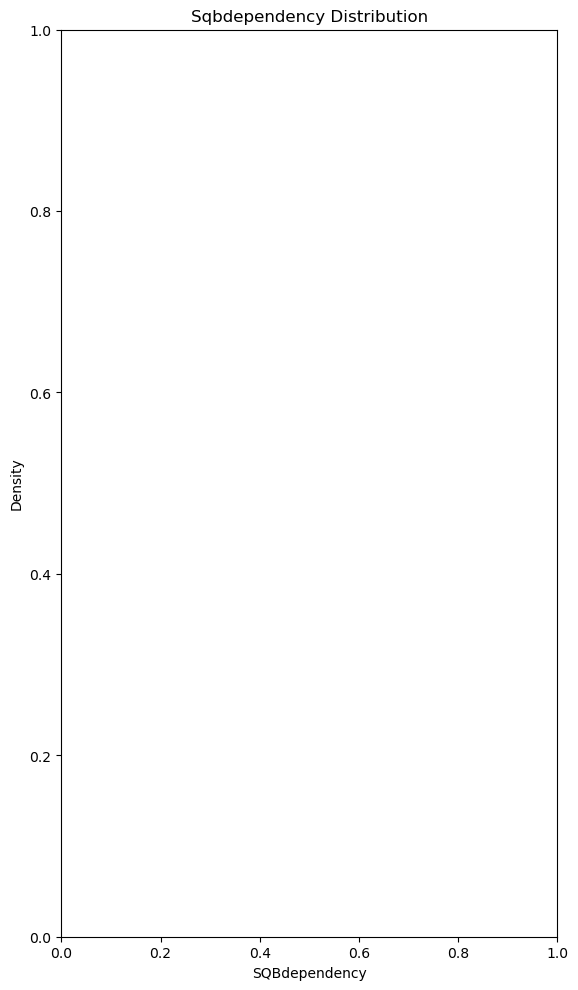

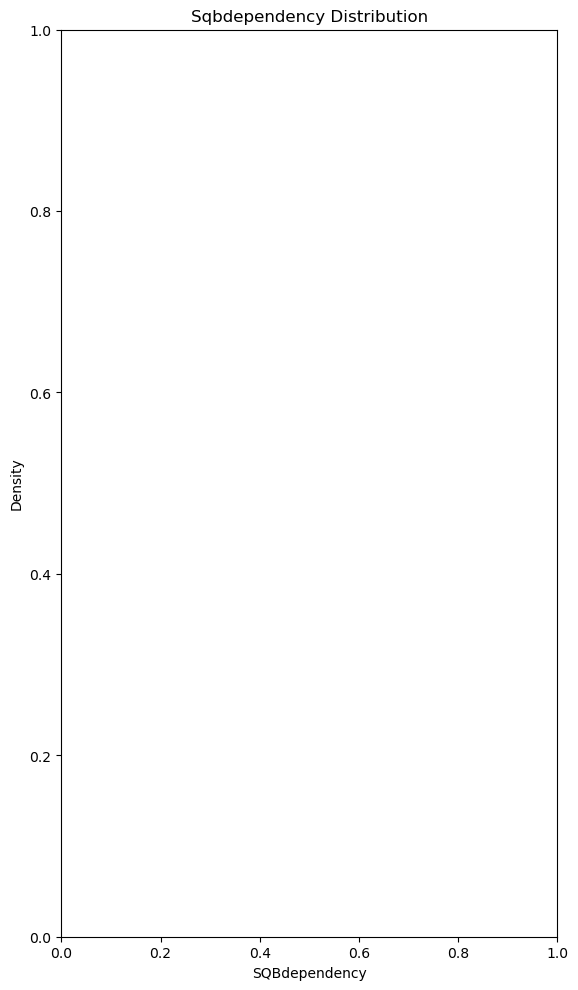

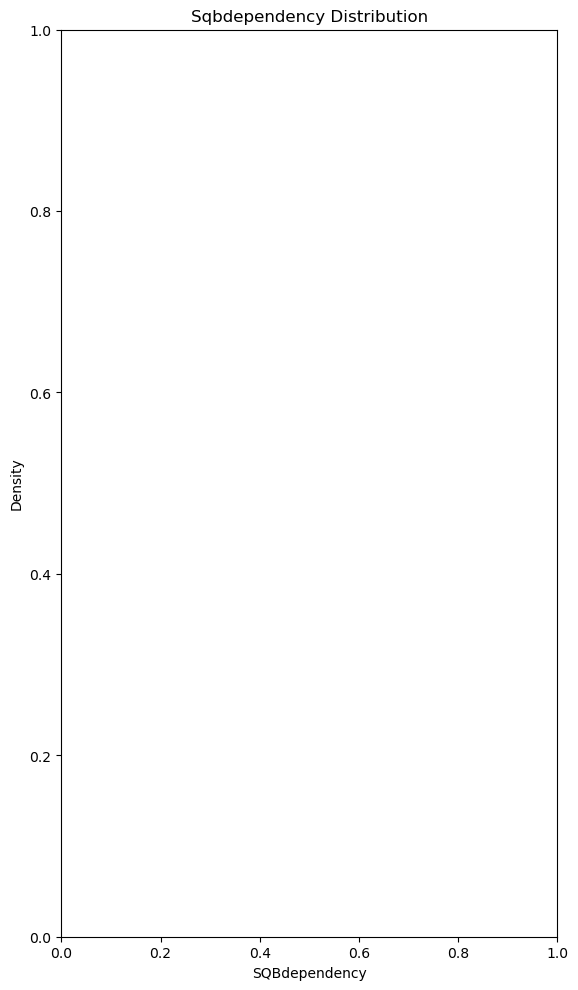

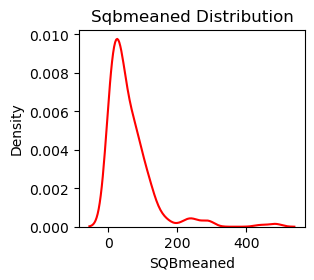

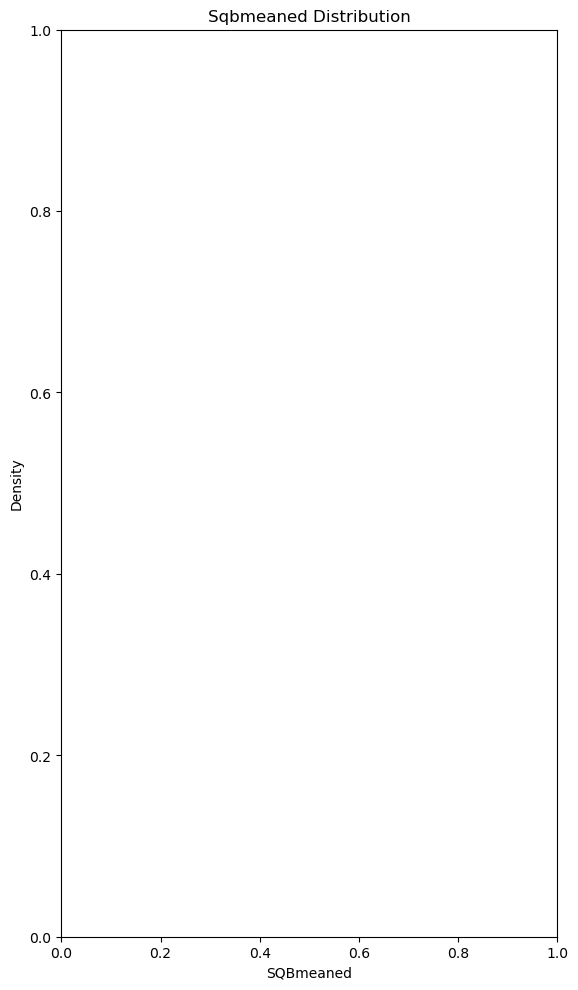

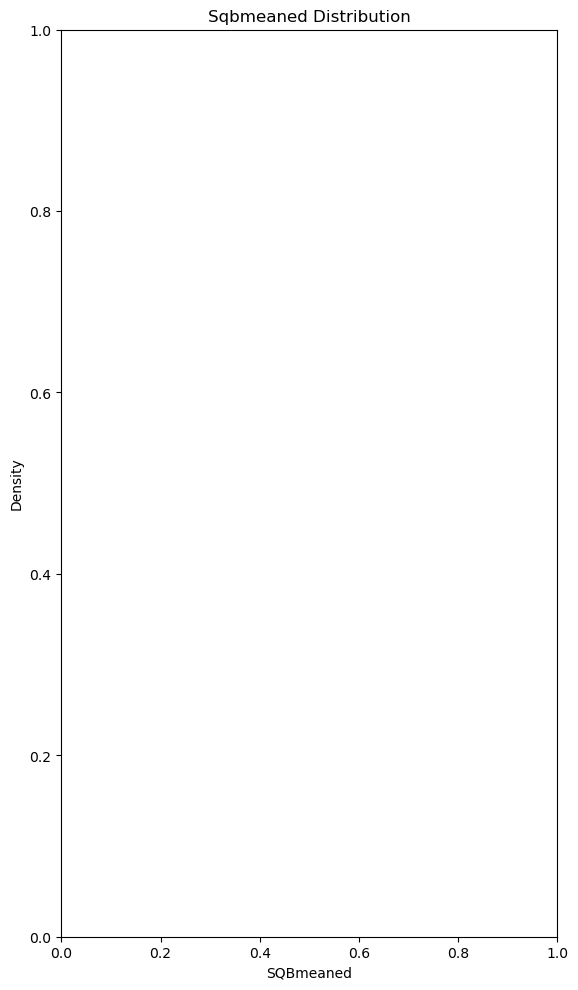

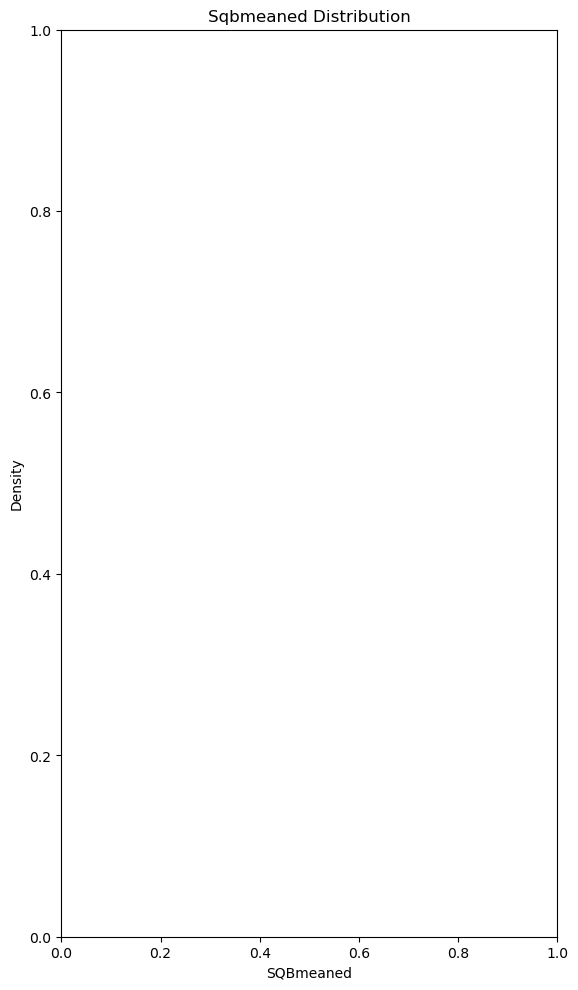

In [15]:
from collections import OrderedDict

plt.figure(figsize=(10, 8))

# color mapping
colors = OrderedDict({1: 'red',
                      2: 'orange',
                      3: 'blue',
                      4: 'green'})
poverty_mapping = OrderedDict({
    1: 'extreme',
    2: 'moderate',
    3: 'vulnerable',
    4: 'non vulnerable'
})

# iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    
    # iterate through the poverty levels
    for poverty_level, color in colors.items():
        
        # plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                   ax=ax, color=color, label=poverty_mapping[poverty_level])
        
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')
        
        plt.subplots_adjust(top=2)
        
        plt.show()

In [17]:
train.select_dtypes('object').head(3)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11


In [20]:
mapping = {'yes': 1, 'no': 0}

# apply same operation to both train and test
for df in [train, test]:
    
    # fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


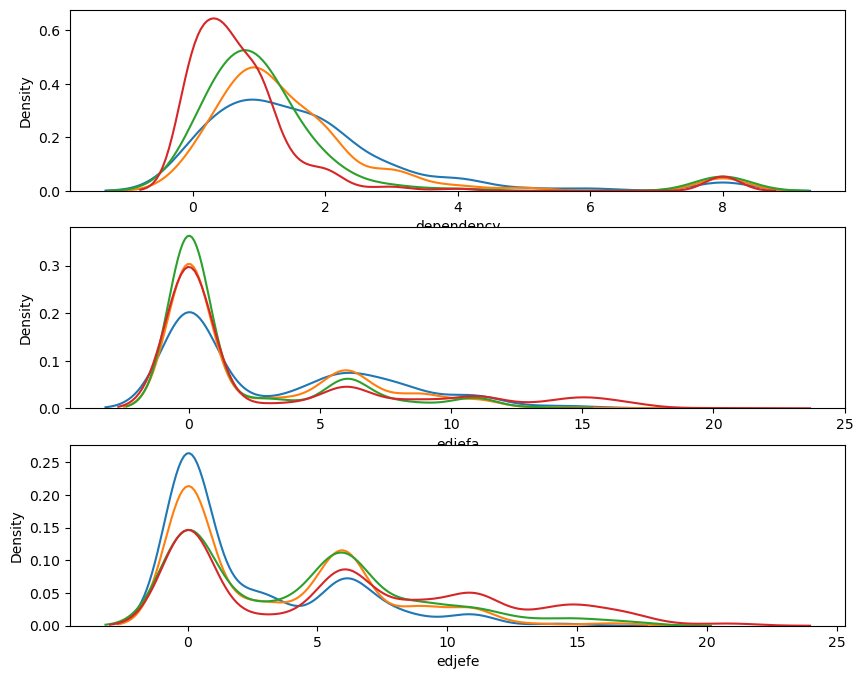

In [24]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    
    for poverty_level, color in colors.items():
        
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna())
    